## Исследование данных о российском кинопрокате



**Цель и задачи**: Провести анализ рынока российского кинопроката и выявить текущие тренды. Уделим внимание фильмам, которые получили государственную поддержку.  Выявим, насколько такие фильмы интересны зрителю. Данные взяты из портала открытых данных Минимстерства культуры. Датасет содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. Заказчиком является Министерство культуры Российской Федерации.

**План исследования**

1. [Открыть файлы с данными и объедините их в один датафрейм;](#1)
    1. [Изучть данные;](#11)
    2. [Вывод.](#12)
2. [Предобработка данных;](#2)
    1. [Проверить типы данных;](#21)
    2. [Изучить пропуски в датафрейме;](#22)
    3. [Изучить дубликаты в датафрейме;](#23)
    4. [Изучить категориальные значения;](#24)
    5. [Изучить столбцы, которые хранят количественные значения;](#25)
    6. [Добавить новые столбцы;](#26)
    7. [Вывод.](#27)
3. [Провести исследовательский анализ данных;](#3)
    1. [Посмотреть, сколько фильмов выходило в прокат каждый год;](#31)
    2. [Изучить, как менялась динамика проката по годам;](#32)
    3. [Посчитать среднюю и медианную сумму сборов для каждого года;](#33)
    4. [Определить, влияет ли возрастное ограничение аудитории;](#34)
    5. [Вывод.](#35)
4. [Исследовать фильмы, которые получили государственную поддержку;](#4)
    1. [Изучить Топ-20 фильмов, которые получили государственную поддержку;](#41)
    2. [Определить, всегда ли высокие рейтинги фильма влекут высокие сборы от их проката;](#42)
    3. [Определить, есть ли зависить в столбцах `box_office`, `budget`, `payback`, `ratings`;](#43) 
    4. [Вывод.](#44)
5. [Общий вывод.](#5)

**Описание данных**

Таблица `mkrf_movies` содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений. 
- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения;
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` — объём возвратных средств государственной поддержки;
- `nonrefundable_support` — объём невозвратных средств государственной поддержки;
- `financing_source` — источник государственного финансирования;
- `budget` — общий бюджет фильма;
- `ratings` — рейтинг фильма на КиноПоиске;
- `genres` — жанр фильма.

Таблица `mkrf_shows` содержит сведения о показах фильмов в российских кинотеатрах.
- `puNumber` — номер прокатного удостоверения;
- `box_office` — сборы в рублях.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм.  <a id='1'></a> <a id='11'></a>

Объединим данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

Для начала импортируем библиотеки для исследования данных и включим отображение всех столбцов.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

# отображаем все столбцы
pd.set_option('display.max_columns', None)

Присвоим 2 датафреймам следующие параметры `mkrf_movies` и `mkrf_shows`.

In [2]:
mkrf_movies = pd.read_csv('datasets/mkrf_movies.csv')
mkrf_shows = pd.read_csv('datasets/mkrf_shows.csv')

Изучим, что представляют из себя 2 датасета.

In [3]:
def df_info(data):
    print(data.info())
    display(data.head(10))
    display(data.describe())

df_info(mkrf_movies)
df_info(mkrf_shows)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


,refundable_support,nonrefundable_support,budget
count,3.320000e+02,3.320000e+02,3.320000e+02
mean,1.186446e+07,4.898099e+07,1.272297e+08
std,2.491656e+07,5.998012e+07,1.885883e+08
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.500000e+07,4.200000e+07
50%,0.000000e+00,3.000000e+07,6.864992e+07
75%,1.500000e+07,4.037500e+07,1.419853e+08
max,1.800000e+08,4.000000e+08,2.305074e+09


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB
None


,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08
5,111000119,4.293650e+06
6,111000212,2.000000e+02
7,111000216,3.555670e+05
8,111000313,7.100000e+02
9,111000314,1.607970e+06


,puNumber,box_office
count,3.158000e+03,3.158000e+03
mean,1.201875e+08,7.647870e+07
std,1.238394e+07,2.403531e+08
min,1.110001e+08,0.000000e+00
25%,1.130002e+08,8.623900e+04
50%,1.210131e+08,2.327988e+06
75%,1.210283e+08,2.397967e+07
max,2.240264e+08,3.073569e+09


- В `mkrf_movies` 7486 строк, в `mkrf_shows` - 3158. Датафреймы имеют разнное количество строк.
- В `mkrf_movies` есть столбцы с пропущенными значениями.
- Данные будем объединять по столбцу `puNumber`, но для начала нужно рассмотреть, что за значения хранит столбец в `mkrf_movies`, т.к. разный тип данных.

In [4]:
mkrf_movies['puNumber'].sort_values().unique()

array([' 111004112', '111000110', '111000111', ..., '231001012',
       '231001111', 'нет'], dtype=object)

В столбце присутствует строковое значение `нет`, уберем его. Не забудем перевсти тип значения `puNumber` в `int`.

In [5]:
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].str.strip()
mkrf_movies = mkrf_movies.query('puNumber != "нет"').reset_index(drop=True)
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int') 

Аномальное значение убрано. Приступим к объеденению датасетов и выведем новый датафрейм.

In [6]:
df = mkrf_movies.merge(mkrf_shows, on='puNumber', how = 'outer')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

#### Вывод <a id='12'></a>

- Датасеты `mkrf_movies` и `mkrf_shows` объедены в датафрейм `df`.
- Столбец `puNumber` имеет тип значения `int`, также была убрана аномалия.
- В датафрейме всего 7458 записей.
- Присутствуют пропуски во многих столбцах.

### Шаг 2. Предобработка данных <a id='2'></a>

#### Шаг 2.1. Проверьте типы данных <a id='21'></a>

- Проверим типы данных в датафрейме и преобразуйте их там, где это необходимо.

Рассмотрим тип данных датасета.

In [7]:
df.dtypes

title                     object
puNumber                   int64
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                   object
genres                    object
box_office               float64
dtype: object

Преобразуем тип значения в следующих столбцах:

- `str`: title, type, film_studio, production_country, director, producer, age_restriction, financing_source, genres.
- `datetime`: show_start_date.
- `float`: ratings.
- `int`: refundable_support, nonrefundable_support, budget, box_office.

Также заполним пропуски в box_office 0, т.к. возможно сборов не было, либо такая информацию отсутсвует на портале.

In [8]:
df_str = ['title', 'type', 'film_studio', 'production_country', 
          'director', 'producer', 'age_restriction', 'financing_source', 'genres']

for _ in df_str:
    df[_] = df[_].astype('string')
    
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format = '%Y-%m-%dT%H:%M:%S.%fZ')


df_int = ['refundable_support', 'nonrefundable_support', 'budget']
for _ in df_int:
    df[_] = df[_].astype('Int64')

df['box_office'] = df['box_office'].fillna(0).astype('int')

Посмотрим, какие значения есть в столбце `ratings`.

In [9]:
df['ratings'].sort_values().unique()

array(['1.0', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8',
       '1.9', '19%', '2.1', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9',
       '28%', '3.0', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7',
       '3.8', '3.9', '4.0', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6',
       '4.7', '4.8', '4.9', '5.0', '5.1', '5.2', '5.3', '5.4', '5.5',
       '5.6', '5.7', '5.8', '5.9', '6.0', '6.1', '6.2', '6.3', '6.4',
       '6.5', '6.6', '6.7', '6.8', '6.9', '62%', '64%', '7.0', '7.1',
       '7.2', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '79%',
       '8.0', '8.1', '8.2', '8.3', '8.4', '8.5', '8.6', '8.7', '8.8',
       '8.9', '83%', '88%', '89%', '9.0', '9.1', '9.2', '90%', '91%',
       '94%', '97%', '98%', '99%', nan], dtype=object)

Видим, что помимо пустых значений есть проценты. Напишем функцию, которая будет заменять проценты на дробные значения. Пустые строки заполним 0.

In [10]:
df['ratings'] =(df['ratings'].astype('str')
                .str.replace('%', '')
                .astype('float')
                .fillna(0)) 

def per_cent(per):
    if per > 10: 
        return per / 10
    return per

df['ratings'] = df['ratings'].apply(per_cent)

#проверка
df['ratings'].sort_values().unique()

array([0. , 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.1, 2.4,
       2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7,
       3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ,
       5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3,
       6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6,
       7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9,
       9. , 9.1, 9.2, 9.4, 9.7, 9.8, 9.9])

Убедимся, что все столбцы поменяли тип значения.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7485 non-null   string        
 1   puNumber               7485 non-null   int64         
 2   show_start_date        7485 non-null   datetime64[ns]
 3   type                   7485 non-null   string        
 4   film_studio            7467 non-null   string        
 5   production_country     7483 non-null   string        
 6   director               7476 non-null   string        
 7   producer               6917 non-null   string        
 8   age_restriction        7485 non-null   string        
 9   refundable_support     332 non-null    Int64         
 10  nonrefundable_support  332 non-null    Int64         
 11  budget                 332 non-null    Int64         
 12  financing_source       332 non-null    string        
 13  rat

#### Шаг 2.2. Изучите пропуски в датафрейме <a id='22'></a>

Рассмотрим пропуски в датафрейме.

In [12]:
df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                     0
genres                    975
box_office                  0
dtype: int64

Имеем пропуски в следующих столбцах: 
- `film_studio` - 18. Возможно, значения заполнял человек. Оставим пропуски, т.к. этот столбец нам не пригодиться для дальнейшего исследования.
- `production_country` - 2, можем посмотреть в интернете и заполнить пустые строки соответственным строчным значением. Скорее всего, значения заполнял человек.
- `director` - 9, заменим пустые строки строчным значением `Неизвестно`. Скорее всего, значения заполнял человек.
- `producer` - 568, заменим пустые строки строчным значением `Неизвестно`. Предположу, что либо это фильмы без продюсирования.
- `refundable_support`, `nonrefundable_support`, `budget`- 7153. Эти столбцы не получиться заполнить, т.к. они относяться к фильмам, которые получили государственное финансирование. 
- `genres` - 975. заменим пустые строки строчным значением `Неизвестно`. Думаю, что при заполнении данных возникли трудности с опрелением жанра фильма.
- `financing_source` - 7153. заменим пустые строки строчным значением `Неизвестно`. Возможно, в датасете не было первоначально известно откуда было финансирование, из-за этого оставили строки пустыми.

Заменим пропуски, там где это возможно.

In [13]:
col = ['director', 'producer', 'genres', 'financing_source']

for c in col: df[col] = df[col].fillna('Неизвестно')

#df[df['production_country'].isna()]
#проверила, что эти киноленты выпущенны в России

df['production_country'] = df['production_country'].fillna('Россия')

Сделаем проверку на наличие пустых строк в датасете.

In [14]:
df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source            0
ratings                     0
genres                      0
box_office                  0
dtype: int64

#### Шаг 2.3. Изучите дубликаты в датафрейме <a id='23'></a>
- Проверим, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

Для начала определим, присутсвуют ли в датафрейме явные дубликаты.

In [15]:
df.duplicated().sum()

0

Явные дубликаты отсутсвуют. Проверим неявные дубликаты между `title`, `director` и `show_start_date`. 

In [16]:
df[df['title'].duplicated() & df['director'].duplicated() & df['show_start_date'].duplicated()].sort_values(by='title')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5057,127 часов,221069011,2011-05-18 12:00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,Неизвестно,7.7,"триллер,биография,драма",0
3129,13 часов: Тайные солдаты Бенгази,121001016,2016-01-15 12:00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,<NA>,<NA>,<NA>,Неизвестно,6.7,"боевик,триллер,драма",18439240
1494,13-й район: Кирпичные особняки,121008314,2014-04-25 12:00:00,Художественный,"Брик Мэншэнс Продакшнз,Синэ+ Канал+, Д8, Европ...",Франция-Канада,Камиль Деламарр,"Люк Бессон, Клод Леже, Джонатан Вэнджер",«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,Неизвестно,5.5,"боевик,криминал",750
4306,13.,121018110,2010-09-30 12:00:00,Художественный,"Барбариан Филмз, Магнет Медиа Групп, Морабито ...",США,Гела Баблуани,Неизвестно,«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,Неизвестно,6.8,"триллер,драма,криминал",0
2281,300 спартанцев: Расцвет империи /По произведен...,221025414,2014-07-25 12:00:00,Художественный,"Уорнер Бразерс, Леджендари Пикчерз, Круэль/Уну...",США,Ноам Мурро,"Марк Кэнтон, Джанни Нуннари, Дебора Снайдер, З...",«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,Неизвестно,6.6,"фэнтези,боевик,военный",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,"Эскадрилья ""Лафайет""",221160910,2010-12-17 12:00:00,Художественный,"Электрик Интертейнмент, Инжениус Интертейнмент...",Франция - США,Тони Билл,"Дин Девлин, Марк Фрайдман",«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,Неизвестно,7.4,"боевик,драма,мелодрама",0
1811,Этим утром в Нью-Йорке,121009614,2014-05-21 12:00:00,Художественный,"Лэндскейп Интертейнмент, Форс Мажор, Проминент...",США,Фил Олден Робинсон,"Боб Купер, Тайлер Митчелл, Дэниэл Дж. Уолкер",«12+» - для детей старше 12 лет,<NA>,<NA>,<NA>,Неизвестно,6.2,"драма,комедия",360
4504,Я ненавижу день святого Валентина,221139210,2010-12-03 12:00:00,Художественный,"Блю Стар Пикчерз, Ай Хэйт Вдэй Продакшнз, Ай С...",США,Ниа Вардалос,"Доминик Йанно, Мэдлейн Шерак, Уильям Шерак",«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,Неизвестно,5.0,"мелодрама,комедия",0
1704,"Я, снова я и мама",121030213,2013-11-21 12:00:00,Художественный,"Гомон, Эль Джи Эм Продакшнз, Ректанль Продюксь...",Франция - Бельгия,Гийом Гальенн,"Жан-Батист Дюпон, Алис Жирар, Сирил Кольбо-Жюстен",«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,Неизвестно,6.3,"комедия,мелодрама,драма",0


Дубликаты могли возникнуть из-за сбора данных об одинаковых фильмах из разных кинотеатров.  Под срез уйдет 540 строк. Уберем их.

In [17]:
df = df.drop(df[df['title'].duplicated() & df['director'].duplicated() \
                & df['show_start_date'].duplicated()].index, inplace = False).reset_index(drop = True)

#### Шаг 2.4. Изучите категориальные значения <a id='24'></a>

- Посмотрим, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправим проблемные значения в поле `type`.

Изучим столбцы с категориальными значениями.

In [18]:
col = ['title', 'type', 'film_studio', 'production_country', 
       'director', 'producer', 'age_restriction', 'genres']

for c in col:
    print(df[c].sort_values().unique())

<StringArray>
[                                                                                                                    ' Я ПРЕПОД',
                                                                                                              '"SOS" над тайгой',
                                                                                                           '"V" значит вендетта',
                                                                             '"АРТиШОК" анимационный альманах авторских фильмов',
                                                                                                '"Бежин луг" Сергея Эйзенштейна',
                                                                                        '"Державная" Размышления 100 лет спустя',
                                                                             '"Зеленое яблоко" анимационный альманах выпуск № 7',
                                                                            

Видим, что в значениях присутствуют проблелы в одних и тех же значениях. Создадим цикл, который уберет некорректные записи.

In [19]:
for c in col:
    df[c] = df[c].str.strip()

In [20]:
print('Символы в title', set( ''.join(df['title'].unique())))

Символы в title {'Й', '%', '6', 'в', ':', '3', '.', 'К', 'З', 'a', 'T', 'й', '7', 's', 'K', '+', 'Щ', 'E', 'Г', '4', 'ю', 'ш', 'z', 'П', '"', 'j', 'd', 'Ъ', 'г', 'В', 'H', 'Р', 'Л', 'з', 'ъ', 'e', 'W', '9', '?', ';', 'ч', '@', 'У', 'y', 'Ё', 'I', 'R', ' ', 'Я', 'p', 'Ю', "'", 'А', '5', ',', '2', 'Б', '=', 'б', 'ы', 'Y', 'Ц', 'G', 'B', '№', 'w', 'Ы', 'h', 'Q', 'Е', 'u', 'ь', '_', 'J', '\\', '/', '1', 'D', '(', 'ф', 'т', 'ц', 'Н', 'С', 'n', '!', 'A', 'X', 'i', 'L', '…', 'Ш', 'о', 'н', 'O', 'и', 'Z', 'x', 'U', 'И', '-', 'с', '0', 'д', 'F', 'P', 'л', 'р', 'Ч', 'V', '#', 'q', 't', 'N', 'f', 'Т', 'я', 'е', 'o', 'k', 'Х', 'щ', 'M', ')', 'm', 'ё', 'l', 'g', 'а', 'ж', 'Э', 'Д', 'Ф', 'э', 'О', 'М', 'Ж', 'Ь', 'п', 'r', 'м', 'к', 'х', 'S', 'C', '8', 'v', 'b', 'у', 'c'}


In [21]:
print('Символы в production_country', set( ''.join(df['production_country'].unique())))

Символы в production_country {'ф', 'т', 'Т', '1', 'ц', 'я', 'У', 'Н', 'С', 'е', 'в', '.', 'Х', 'З', ' ', 'К', 'Я', 'Ю', 'й', 'А', ',', '2', 'Щ', 'Ш', 'Б', 'а', 'о', 'б', 'н', 'ж', 'Г', 'и', 'ы', 'Э', 'ю', 'Д', 'Ф', 'И', 'ш', 'э', '-', 'с', 'П', 'О', 'д', 'М', '0', 'г', 'п', 'В', 'л', 'Р', 'р', 'ь', 'Л', 'з', 'Ч', 'ъ', 'м', 'к', 'х', 'C', '9', ';', 'у'}


In [22]:
print('Символы в genres', set( ''.join(df['genres'].unique())))

Символы в genres {'ф', 'т', 'Т', 'я', 'ц', 'Н', 'е', 'в', ' ', 'й', ',', 'о', 'а', 'б', 'н', 'ж', 'у', 'ы', 'и', 'ю', 'э', '-', 'с', 'д', 'г', 'п', 'л', 'В', 'р', 'ь', 'з', 'м', 'к', 'х', 'ч'}


In [23]:
print('Символы в type', set( ''.join(df['type'].unique())))

Символы в type {'т', 'ц', 'я', 'Н', 'е', 'в', 'Х', 'й', 'А', 'о', 'а', 'н', 'ж', 'и', 'ы', 'Д', '-', 'с', 'П', 'д', 'М', 'п', 'ч', 'л', 'р', 'ь', 'з', 'м', 'к', 'у'}


В значениях присутствует огромное количество лишних символов. Рассмотрим для каждый случай.
Также заметила, что есть дублирующие по смыслу значения в следующих столбцах:

- в `title` - в некоторых названиях фильмов в конце присутствуют символы: `_`, `.`, `-` и написаны в разном регистре. Такие символы создают лишние дубли в некторых названиях фильмов. Уберем эти символы и запишем с столбец названия с большой буквы.
- `film_studio` - есть названия, которые имеют анолагичные значения, но при этом написаны в разном регистре. Оставим как есть, т.к. для дальнейшего исследования нам они не понадобяться.
- `production_country` - есть значение 2019, рассмотрим, что это за запись и сделаем подходящую замену. Между названиями стран в большинстве случае стоит `-` , приведем их к общему виду датасета. Также присутствуют значения по типу `Канада - США` и `США - Канада`. Производить замену таких значений не потребуется, т.к. порядок, скорее всего, определяется в зависимости от того, на какой территории страны больше всего снимали фильм.
- `director` - скорее всего эти значения заполнялись вручную, т.к. присутствуют эквивалентные значения, например, с ошибкой в фамилии `Анн Фонтейн`и `Анн Фонтен`, либо есть значения такого формата: `А.Сидоров` или такого `А.Сидоров, О.Фомин, Р.Ярославцев`. Исходя, из задания по исследованию, чуть ниже оставим только главного режиссера, значения оставим без изменения, т.к. в дальнейшем они нам не понадобяться.
- `producer` - оставим без изменения, т.к. в дальнейшем они не пригодяться нам для исследования.
- `age_restriction` - здесь не требуется как-либо видоизменять записи.
- `genres` - ниже создадим столбец с главным жанром.
- `type` - уже убрали пробелы. 

In [24]:
remove_sym_title = ['_', '.', '-']
remove_sym_production_country = ['-']

for r in remove_sym_title:
    df['title'] = df['title'].str.replace(r, '').str.title()
    
for r in remove_sym_production_country:    
    df['production_country'] = df['production_country'].str.replace(r, ', ')


/tmp/ipykernel_48/3191615647.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['title'] = df['title'].str.replace(r, '').str.title()


Посмотрим столбец `Посмотрим столбец` со значением 2019.

In [25]:
df.query('production_country == "2019"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6711,Дело Коллини,121027219,2019-09-19 12:00:00,Художественный,"Константин Филм, Глобал Скрин, Севен Пикчерз Сван",2019,Марко Кройцпайнтнер,"Мартин Московиц, Кристоф Мюллер, Марсель Хартг...",«16+» - для детей старше 16 лет,<NA>,<NA>,<NA>,Неизвестно,7.4,"детектив,драма,криминал",0


Исходя из информации в Википедии, фильм `Дело Коллини` был снят в Германии. Изменим строковое значение `2019` на `Германия`.

In [26]:
df.loc[6711, 'production_country'] = 'Германия'

#убедимся, что в строчке 2019 поменялось на Германия
df['production_country'][6711]

'Германия'

Проверим значения столбца `'type'`.

In [27]:
df['type'].value_counts()

Художественный                5425
Анимационный                   785
Прочие                         396
Документальный                 286
Научно-популярный               52
Музыкально-развлекательный       1
Name: type, dtype: Int64

#### Шаг 2.5. Проверьте количественные значения <a id='25'></a>

- Проверим, обнаружились ли в таких столбцах подозрительные данные.


Рассмотрим столбцы `refundable_support`, `nonrefundable_support`, `budget`, `box_office`. Выведем описательную статистику для каждого из них.

In [28]:
display(df[['budget', 'refundable_support', 'nonrefundable_support',
    'box_office']].describe().round(2))
df.info()

,budget,refundable_support,nonrefundable_support,box_office
count,3.310000e+02,3.310000e+02,3.310000e+02,6.945000e+03
mean,1.274691e+08,1.190030e+07,4.903833e+07,3.338982e+07
std,1.888233e+08,2.494570e+07,6.006181e+07,1.625722e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.200000e+07,0.000000e+00,2.500000e+07,0.000000e+00
50%,6.880923e+07,0.000000e+00,3.000000e+07,0.000000e+00
75%,1.439456e+08,1.500000e+07,4.075000e+07,1.385124e+06
max,2.305074e+09,1.800000e+08,4.000000e+08,3.073569e+09


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6945 entries, 0 to 6944
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  6945 non-null   string        
 1   puNumber               6945 non-null   int64         
 2   show_start_date        6945 non-null   datetime64[ns]
 3   type                   6945 non-null   string        
 4   film_studio            6928 non-null   string        
 5   production_country     6945 non-null   string        
 6   director               6945 non-null   string        
 7   producer               6945 non-null   string        
 8   age_restriction        6945 non-null   string        
 9   refundable_support     331 non-null    Int64         
 10  nonrefundable_support  331 non-null    Int64         
 11  budget                 331 non-null    Int64         
 12  financing_source       6945 non-null   string        
 13  rat

По условию столбец `budget` уже включает в себя полный объём государственной поддержки. Проверим, не превышает ли сумма государственной поддержки бюджет фильма.

In [29]:
df_budget = df[df['budget'] < df['refundable_support'] + df['nonrefundable_support']]

display(df_budget)
print('Количество строк: ' + str(len(df_budget)))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1928,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0,23000000,0,"Министерство культуры, Фонд кино",6.6,мелодрама,10234016
1933,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0,75000000,0,Фонд кино,6.6,драма,446163511
2314,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000,70000000,0,Фонд кино,7.8,"боевик,драма,криминал",196572438
2372,Бармен,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000,0,0,Фонд кино,6.2,"комедия,фэнтези",67418974
2448,Савва Сердце Воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000,100000000,0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",184487551
2512,Тряпичный Союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0,59000000,0,Фонд кино,6.3,"комедия,драма",1957738
2608,Срочно Выйду Замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0,35000000,0,Фонд кино,5.1,"комедия,мелодрама",72937783
2688,Помню Не Помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0,6000000,0,Министерство культуры,4.3,комедия,15362931
2854,Любовь С Ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000,51000000,0,Фонд кино,6.3,"комедия,мелодрама",70299052
3348,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0,250000000,0,Фонд кино,5.6,фантастика,1038321489


Количество строк: 17


Видим, что всего таких строк 17. Заменим значения `budget` суммой гос. поддержки.

In [30]:
df.loc[df_budget.index, 'budget'] = (df.loc[df_budget.index, 'refundable_support']
                                     + df.loc[df_budget.index, 'nonrefundable_support'])

Построим графики "Ящик с усами" для количсественых значений. Рассмотрим аномалии и выбросы в них.

Количество выбросов 28
Доля выбросов 0.4 %


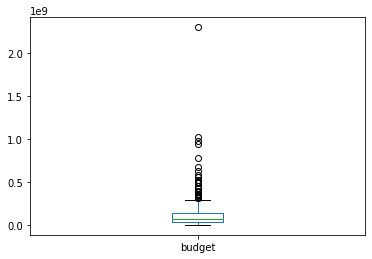

In [33]:
_, bp = df.budget.plot.box(return_type='both')

outliers = [flier.get_ydata() for flier in bp["fliers"]][0]
df[df.budget.isin(outliers)]

print('Количество выбросов', df[df.budget.isin(outliers)]['budget'].count())
print('Доля выбросов', (df[df.budget.isin(outliers)]['budget'].count() / df.puNumber.count() * 100).round(2), '%')

В cтолбце `budget` всего 28 выбросов, доля выбросов от общего числа строк 0,4%. Уберем эти значения.

In [34]:
df = df.drop(df[df.budget.isin(outliers)].index)

Количество выбросов 35
Доля выбросов 0.51 %


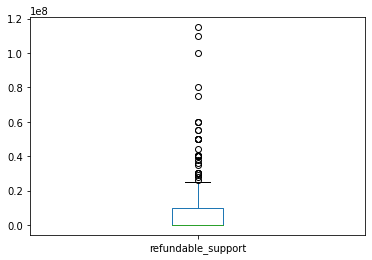

In [35]:
_, bp = df.refundable_support.plot.box(return_type='both')

outliers = [flier.get_ydata() for flier in bp["fliers"]][0]
df[df.refundable_support.isin(outliers)]

print('Количество выбросов', df[df.refundable_support.isin(outliers)]['refundable_support'].count())
print('Доля выбросов', (df[df.refundable_support.isin(outliers)]['refundable_support'].count() / df.puNumber.count() * 100).round(2), '%')

В cтолбце `refundable_support` 35 выбросов, доля выбросов от общего числа строк 0.51%. Уберем эти значения.

In [36]:
df = df.drop(df[df.refundable_support.isin(outliers)].index)

Количество выбросов 38
Доля выбросов 0.55 %


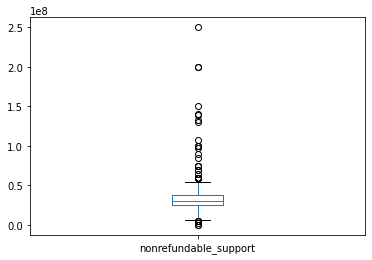

In [37]:
_, bp = df.nonrefundable_support.plot.box(return_type='both')

outliers = [flier.get_ydata() for flier in bp["fliers"]][0]
#df[df.refundable_support.isin(outliers)]

print('Количество выбросов', df[df.nonrefundable_support.isin(outliers)]['nonrefundable_support'].count())
print('Доля выбросов', (df[df.nonrefundable_support.isin(outliers)]['nonrefundable_support'].count() / df.puNumber.count() * 100).round(2), '%')

В cтолбце `nonrefundable_support` 33 выбросов, доля выбросов от общего числа строк 0.55%. Уберем эти значения.

In [38]:
df = df.drop(df[df.nonrefundable_support.isin(outliers)].index)

Количество выбросов 1364
Доля выбросов 19.93 %


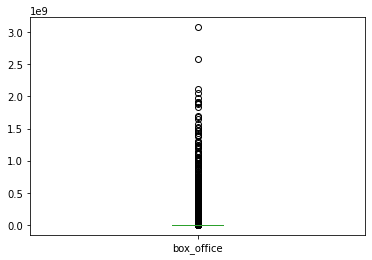

In [39]:
_, bp = df.box_office.plot.box(return_type='both')

outliers = [flier.get_ydata() for flier in bp["fliers"]][0]
df[df.box_office.isin(outliers)]

print('Количество выбросов', df[df.box_office.isin(outliers)]['box_office'].count())
print('Доля выбросов', (df[df.box_office.isin(outliers)]['box_office'].count() / df.puNumber.count() * 100).round(2), '%')

В cтолбце `box_office` 1364 пропуска, доля выбросов от общего числа строк 19.93%. Так как рекомендуется удалять не более 10%  от первичных данных, возьмем в качестве верхней граници 842596810.  

In [40]:
df = df.query('0 <= box_office < 842596810')

Проверим количество записей.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6781 entries, 0 to 6944
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  6781 non-null   string        
 1   puNumber               6781 non-null   int64         
 2   show_start_date        6781 non-null   datetime64[ns]
 3   type                   6781 non-null   string        
 4   film_studio            6764 non-null   string        
 5   production_country     6781 non-null   string        
 6   director               6781 non-null   string        
 7   producer               6781 non-null   string        
 8   age_restriction        6781 non-null   string        
 9   refundable_support     229 non-null    Int64         
 10  nonrefundable_support  229 non-null    Int64         
 11  budget                 229 non-null    Int64         
 12  financing_source       6781 non-null   string        
 13  rat

#### Шаг 2.6. Добавьте новые столбцы <a id='26'></a>

- Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

Добавим столбец `year` и запишим год проката фильмов.

In [42]:
df['year'] = df['show_start_date'].dt.year

#проверка
print(df['year'])

0       2015
1       2016
2       2016
3       2016
4       2015
        ... 
6940    2019
6941    2019
6942    2019
6943    2019
6944    2019
Name: year, Length: 6781, dtype: int64


- Создим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

Создадим функцию, которая иницирует создание новых столбцов с главным режиссером и жанром фильма.

In [43]:
def main_add(df, par):
    for p in par:
        df[f'{p}_main'] = df[p].apply(lambda x: x.split(',')[0])
    return df


df = main_add(df, ['director', 'genres'])
df.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,director_main,genres_main
0,Открытый Простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,<NA>,<NA>,<NA>,Неизвестно,7.2,"боевик,драма,мелодрама",0,2015,Кевин Костнер,боевик
1,Особо Важное Задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Неизвестно,«6+» - для детей старше 6 лет,<NA>,<NA>,<NA>,Неизвестно,6.6,"драма,военный",0,2016,Е.Матвеев,драма
2,Особо Опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,<NA>,<NA>,<NA>,Неизвестно,6.8,"фантастика,боевик,триллер",0,2016,Тимур Бекмамбетов,фантастика
3,Особо Опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,<NA>,<NA>,<NA>,Неизвестно,6.8,"фантастика,боевик,триллер",0,2016,Тимур Бекмамбетов,фантастика
4,Особо Опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,<NA>,<NA>,<NA>,Неизвестно,6.8,"фантастика,боевик,триллер",0,2015,Тимур Бекмамбетов,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

Добавим новый столбец `gover_budget_ratio` и определим долю гос. поддержки для каждой записи. Также с помощью медианого значения найдем долю государственной поддержки от общего бюджета фильма.

In [44]:
df['gover_budget_ratio'] = (df['refundable_support'] + df['nonrefundable_support']) / df['budget']


print('Доля государственной поддержки от общего бюджета фильма', str(df['gover_budget_ratio'].median().round(2)))

Доля государственной поддержки от общего бюджета фильма 0.62


#### Вывод <a id='27'></a>

Всегда важно проводить предобработку данных в датасете перед исследованием. В ходе предобработке было сделано следующее:
- изменены типы значений в датасете;
- заполнены пропуски в столбцах `production_country`, `director`, `producer`, `genres`;
- В столбце `ratings` были процентные значеня, заменили их на вещественные.
- В датафрейме отсутсвуют явные дубликаты. Определили и убрали неявные дубликаты, которые совпадают по столбцам `title`, `director` и `show_start_date`.
- Были изучены категориальные значеня. В названиях значений присутствовали пробелы и лишние символы. С помощью метода `str.strip()` привели значения к общему виду.
- Были изучены количественные значения. Проверили в каких записях в столбце `budget` сумма государственной поддержки превышает бюджет фильма, таких строк оказалось 17. Заменили данные значения суммой гос. поддержки. Убрали аномалии.
- Добавили новые столбцы для исследования: `year` - год проката фильмов, `director_main` - имя и фамилия главного режиссера для каждой записи, `genres_main` - основной жанр фильма и `gover_budget_ratio` - доля гос. поддержки от общего бюджета фильма для каждой записи. 
- Доля государственной поддержки от общего бюджета фильма составляет 0.62.

### Шаг 3. Проведите исследовательский анализ данных <a id='3'></a>


Создадим сводную таблицу с количеством фильмов, которые вышли в прокат (`released`), общим количеством фильмов за год (`total_film_year`) и процентом проката за каждый год (`released_%`). <a id='31'></a>

In [45]:
df_pivot = (df.query('box_office > 0')
              .pivot_table(index='year' , 
                           values='box_office', 
                           aggfunc=['count', 'sum', 'mean', 'median'])
              .droplevel(1,axis=1)
              .rename(columns = {'count' : 'released', 'sum':'budget_sum'})
           )
df_pivot['total_film_year'] = df.pivot_table(index='year', values='puNumber', aggfunc='count')

df_pivot['released_%'] =round((df_pivot['released'] / df_pivot['total_film_year'] * 100), 2) 

df_pivot = df_pivot.reset_index()

df_pivot

,year,released,budget_sum,mean,median,total_film_year,released_%
0,2010,88,2399095,2.726244e+04,2085.0,784,11.22
1,2011,102,13970875,1.369694e+05,3042.5,521,19.58
2,2012,114,6466906,5.672725e+04,6752.5,542,21.03
3,2013,172,9815068,5.706435e+04,3680.0,603,28.52
4,2014,247,3884367291,1.572618e+07,22490.0,735,33.61
5,2015,405,22777614978,5.624102e+07,4084228.0,641,63.18
6,2016,475,24107310573,5.075223e+07,3133221.0,750,63.33
7,2017,328,21756613683,6.633114e+07,8214761.0,471,69.64
8,2018,441,25916633419,5.876788e+07,7305550.0,853,51.70
9,2019,497,22702839348,4.567976e+07,4125676.0,881,56.41


Видим, что с каждым годом количество фильмов, которые вошли в прокат - увеличивается. При этом максимальная доля выпущенных в прокат фильмов составляет 71.34% (в 2017 году). Визуализируем полученные данные с помощью библиотеки `seaborn`.

Доля фильмов, для которых есть информация о сборах: 42.31 %


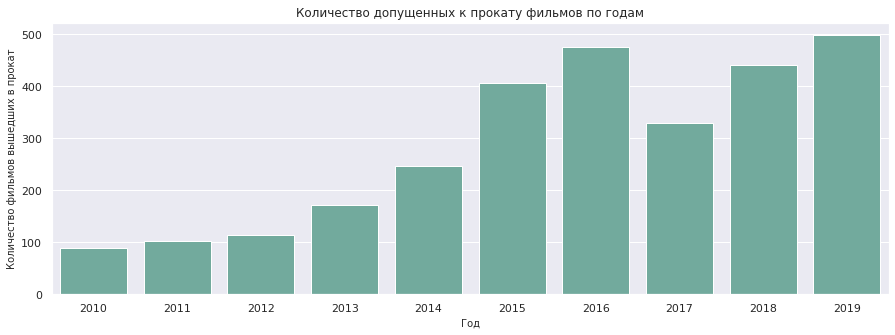

In [46]:
sns.set(rc={'figure.figsize':(15,5)})

ax = sns.barplot(data=df_pivot, x="year", y="released", color='#69b3a2').set_title('Количество допущенных к прокату фильмов по годам');
plt.xlabel("Год", size=10);
plt.ylabel("Количество фильмов вышедших в прокат", size=10);

print('Доля фильмов, для которых есть информация о сборах:', round(df.query('box_office > 0')['box_office'].count() / df['box_office'].count() * 100, 2), '%')

- Доля фильмов, для которых есть информация о сборах: 42.31%
- С 2010 года заметен рост вышедших фильмов в прокат.
- В 2017 году был резкий спад, но с 2018 г. значения вернулись в норму 2016 г. Скорее всего такой спад связан с <a href="https://www.kinopoisk.ru/media/news/2962751/"> повышеннием стоимости прокатного удостоверения до 5 млн. руб.</a> 
- Начиная с 2015 и до 2019 года доля фильмов, о которых известны результаты проката резко растет. 

Построим график изменение цены по годам. Отметимь минимальную и максимальную сумму прокатов. <a id='32'></a>

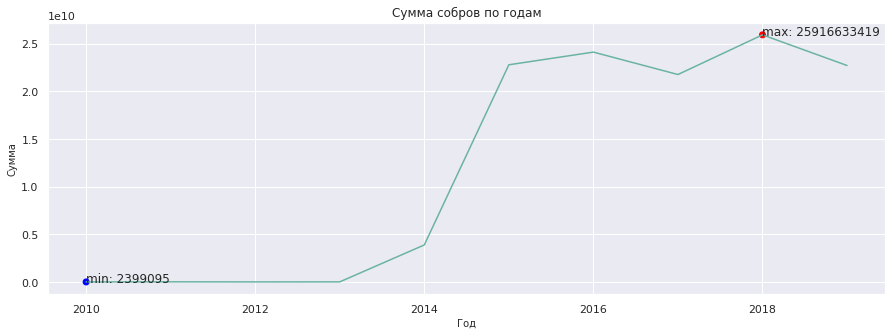

In [47]:
min_budget_sum = df_pivot["budget_sum"].min()
max_budget_sum = df_pivot["budget_sum"].max()

x = [2010,2018]
y = [min_budget_sum, max_budget_sum]

sns.set(rc={'figure.figsize':(15,5)})

ax = sns.lineplot(data=df_pivot, x="year", y="budget_sum", color='#69b3a2').set_title('Сумма собров по годам');


plt.text(x[0], y[0], f'min: {y[0]}')
plt.text(x[1],y[1], f'max: {y[1]}')
plt.scatter(x, y, c=["blue", "red"])
plt.xlabel("Год", size=10);
plt.ylabel("Сумма", size=10);


Итак, 
- Минимальная сумма сборов была в 2010 году и составила 2399095, в свою очередь максимальная  сумма сборов составляет 25916633419 (в 2018 г.). 
- С 2014 по 2018 г сборы значительно увелечились.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года. <a id='33'></a>

In [48]:
df_pivot[['mean', 'median']]

,mean,median
0,2.726244e+04,2085.0
1,1.369694e+05,3042.5
2,5.672725e+04,6752.5
3,5.706435e+04,3680.0
4,1.572618e+07,22490.0
5,5.624102e+07,4084228.0
6,5.075223e+07,3133221.0
7,6.633114e+07,8214761.0
8,5.876788e+07,7305550.0
9,4.567976e+07,4125676.0


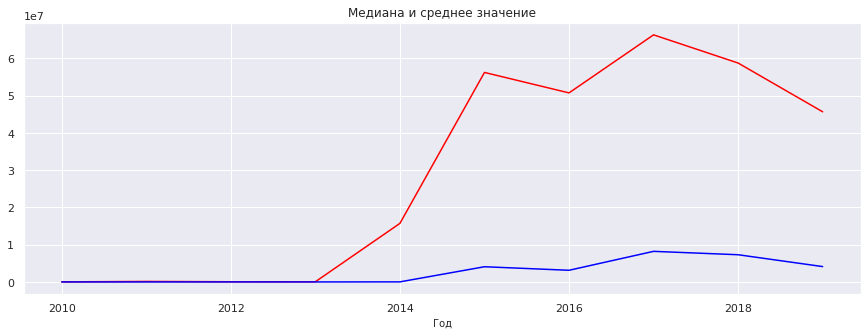

In [49]:
sns.set(rc={'figure.figsize':(15,5)})

sns.lineplot(data=df_pivot, x="year", y="mean", color='red').set_title('Медиана и среднее значение');
sns.lineplot(data=df_pivot, x="year", y="median", color='blue');

plt.xlabel("Год", size=10);
plt.ylabel("", size=10);

Видим, что среднее и медиана сильно разняться. Это говорит нам об асимметрии, при этом, если среднее значение переменной больше медианы, ее распределение имеет положительную асимметрию. Также это говорит нам о наличие выбросах в столбце.

Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год. <a id='34'></a>

Рассмотрим влияния возрастного ограничения на сборы с 2015 по 2019 гг.

In [50]:
df_age_pivot = (df.query('box_office > 0')
                  .pivot_table(index='year', 
                             columns='age_restriction', 
                             values='box_office', 
                             aggfunc='sum')
                  #.reset_index()
               ) 
df_age_pivot

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
year,,,,,
2010,1868947.0,1.143760e+05,3.615220e+05,5.425000e+04,NaN
2011,13370586.0,2.184560e+05,3.807930e+05,1.040000e+03,NaN
2012,2262693.0,1.001790e+05,2.782744e+06,1.821300e+05,1.139160e+06
2013,2708202.0,9.531150e+05,6.577290e+05,5.140985e+06,3.550370e+05
2014,29390721.0,5.471068e+08,5.442458e+08,1.154373e+09,1.609251e+09
2015,273367878.0,6.840915e+09,7.811450e+09,4.027646e+09,3.824235e+09
2016,150183539.0,5.118206e+09,8.572529e+09,5.078332e+09,5.188059e+09
2017,23120744.0,1.805253e+09,8.700269e+09,7.734259e+09,3.493712e+09
2018,32449001.0,4.870069e+09,9.126963e+09,6.502437e+09,5.384714e+09


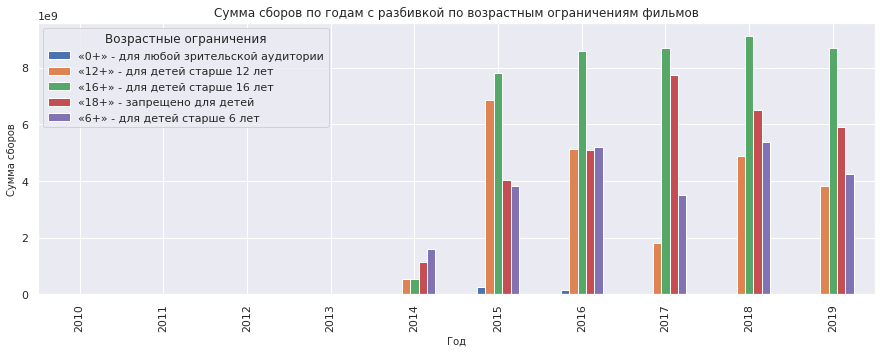

In [51]:
df_age_pivot.plot.bar().set_title('Сумма сборов по годам с разбивкой по возрастным ограничениям фильмов');

plt.xlabel("Год", size=10);
plt.ylabel("Сумма сборов", size=10);
plt.legend(title='Возрастные ограничения');

- с 2010 по 2014 г суммы сборов фильмов для каждого возрастного огранчения были минимальными.
- с 2015 по 2018 г лидировали фильмы с ограничение 16+, в остальных категориях заметен небольшой спад или значения не особо менялись.В 2018 г сбор составил 9.126963^9 (при этом это значение является максимальным за все время и во всех категориях возрастного ограничения). 
- Меньше всего сборов за все время собрала категория 0+.

#### Вывод <a id='35'></a>

Исходя из поставленных задач, были сделанны следующие выводы:

Исследование количества допущенных к прокату фильмов по годам

- Доля фильмов, для которых есть информация о сборах: 42.31%
- С 2010 года заметен рост вышедших фильмов в прокат.
- В 2017 году был резкий спад, но с 2018 г. значения вернулись в норму 2016 г. Скорее всего такой спад связан с <a href="https://www.kinopoisk.ru/media/news/2962751/"> повышеннием стоимости прокатного удостоверения до 5 млн. руб.</a> 
- Начиная с 2015 и до 2019 года доля фильмов, о которых известны результаты проката резко растет.

Изучение суммы сборов по годам

- Минимальная сумма сборов была в 2010 году и составила 2399095, в свою очередь максимальная  сумма сборов составляет 25916633419 (в 2018 г.). 
- С 2014 по 2018 г сборы значительно увелечились.

Изучение средних и медианых сумм сбора по годам

- Видим, что среднее и медиана сильно разняться. Это говорит нам об асимметрии, при этом, если среднее значение переменной больше медианы, ее распределение имеет положительную асимметрию. Также это говорит нам о наличие выбросах в столбце.

Исследование сумм сборов по годам с разбивкой по возрастным ограничениям фильмов

- с 2010 по 2014 г суммы сборов фильмов для каждого возрастного огранчения были минимальными.
- с 2015 по 2018 г лидировали фильмы с ограничение 16+, в остальных категориях заметен небольшой спад или значения не особо менялись.В 2018 г сбор составил 9.126963^9 (при этом это значение является максимальным за все время и во всех категориях возрастного ограничения). 
- Меньше всего сборов за все время собрала категория 0+.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку <a id='4'></a>


Создадим новый датасет для исследования фильмов, получивших гос. поддержку. Добавим столбец `payback`: соотношение сборов к бюджетам фильмов.

In [52]:
df_gover = df.query('financing_source != "Неизвестно"').reset_index(drop=True)
df_gover['payback'] = df_gover['box_office'] / df_gover['budget']

df_gover

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,director_main,genres_main,gover_budget_ratio,payback
0,Пока Еще Жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0,26500000,79411900,Министерство культуры,8.1,"драма,мелодрама",365353,2013,А.Атанесян,драма,0.333703,0.004601
1,Бесславные Придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0,26000000,37142857,Министерство культуры,0.0,Неизвестно,28140,2014,А.Якимчук,Неизвестно,0.7,0.000758
2,Берцы,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0,28000000,40574140,Министерство культуры,4.2,драма,55917,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.690095,0.001378
3,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0,25000000,40015122,Министерство культуры,6.4,драма,232100,2014,М.Угаров,драма,0.624764,0.0058
4,Тайна Сухаревой Башни Чародей Равновесия,114000115,2015-02-18 12:00:00,Анимационный,"ООО ""Студия ""Мастер-Фильм""",Россия,С.Серегин,А.Герасимов,«6+» - для детей старше 6 лет,0,25000000,51850000,Министерство культуры,6.1,"мультфильм,фэнтези,история",15078858,2015,С.Серегин,мультфильм,0.48216,0.290817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Новогодний Ремонт,111018219,2019-11-07 12:00:00,Художественный,"ООО ""ВитЭл""",Россия,А.Пинхасов,"Е.Михайлова, В.Галыгин, В.Колесник, А.Седых, Г...",«12+» - для детей старше 12 лет,0,20000000,30448911,Министерство культуры,5.6,"комедия,мелодрама",3591456,2019,А.Пинхасов,комедия,0.656838,0.11795
225,Успех,111018519,2019-11-04 12:00:00,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Бобза, Г.Малков, В.Поляков, М.Кучмент",«12+» - для детей старше 12 лет,5000000,20000000,75000000,Фонд кино,7.8,драма,3181218,2019,П.Руминов,драма,0.333333,0.042416
226,Кроличья Лапа,111018919,2019-11-20 12:00:00,Художественный,"ООО ""Зебра"", ""Артемис"", ""Гринлит""","Россия, Бельгия, Финляндия",Н.Джорджадзе,Ю.Соболевская,«16+» - для детей старше 16 лет,0,30000000,47734050,Министерство культуры,0.0,Неизвестно,0,2019,Н.Джорджадзе,Неизвестно,0.628482,0.0
227,Тварь,111019419,2019-11-26 12:00:00,Художественный,"ООО ""СОК""",Россия,О.Городецкая,"П.Зарукин, О.Филипук, Ф.Ламшин, М.Абрамов, Н.Т...",«16+» - для детей старше 16 лет,5000000,35000000,78422212,Фонд кино,5.0,"триллер,драма",18617156,2019,О.Городецкая,триллер,0.51006,0.237396


- Изучить Топ-20 фильмов, которые получили государственную поддержку. <a id='41'></a>

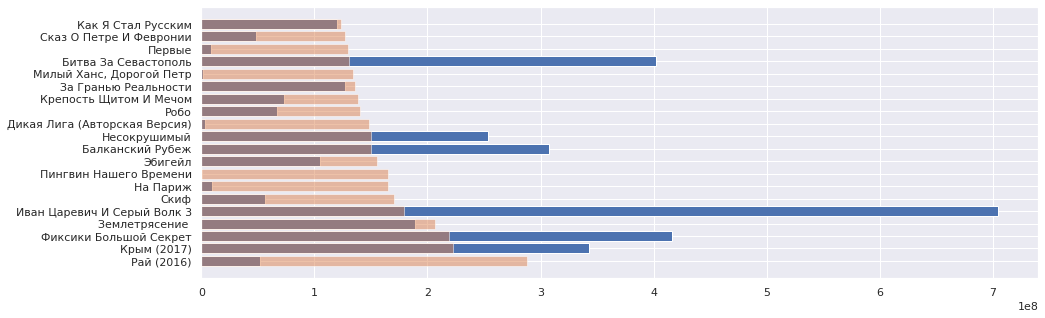

In [53]:
#df.info()

df_budget =(df_gover.query('box_office != 0')
                    .pivot_table(index='title',
                                 values=['budget','box_office', 'payback'],
                          )
                    .sort_values(by='budget', ascending=False)
                    .reset_index()
                    .head(20)
)

plt.barh(y=df_budget.title, width=df_budget.box_office); #синим цветом отмечен сбор
plt.barh(y=df_budget.title, width=df_budget.budget, alpha=0.5); #оранжевым отмечен гос. поддержка

- Самую большую гос. поддеружку получил фильм российско-китайского производства `Рай (2016)` (287802711), но при этом он не окупился (51704986). 
- Из нашего топ-20, видим, что фильм `Иван Царевич И Серый Волк 3` собрал 704928216 при бюджете 179257987. Видно, что этот фильм себя оккупил.

In [54]:
df_budget = df_budget.sort_values(by='payback', ascending=False)
df_budget

,title,box_office,budget,payback
4,Иван Царевич И Серый Волк 3,704928216,179257987.0,3.932479
16,Битва За Севастополь,401804461,131000000.0,3.06721
9,Балканский Рубеж,307650644,150000000.0,2.051004
2,Фиксики Большой Секрет,416349089,219398491.0,1.897684
10,Несокрушимый,253575226,150000000.0,1.690502
1,Крым (2017),342898736,222513841.0,1.541022
19,Как Я Стал Русским,119607532,123714264.0,0.966805
14,За Гранью Реальности,126713450,136230333.0,0.930141
3,Землетрясение,188605593,206982031.0,0.911217
8,Эбигейл,104763979,154989700.0,0.675942


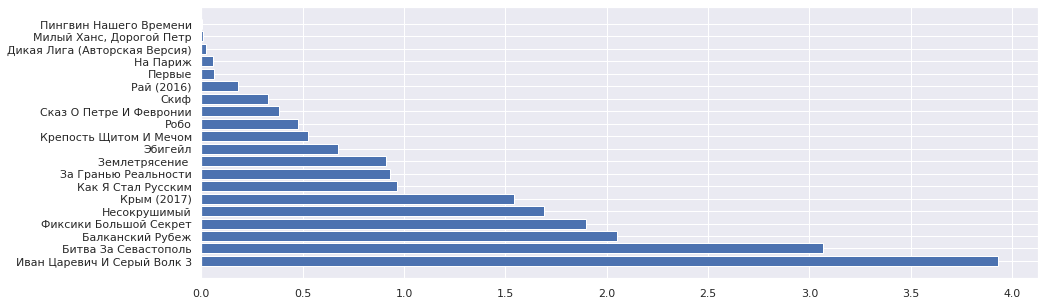

In [55]:
plt.barh(y=df_budget.title, width=df_budget.payback);

На графике видно: фильм `Иван Царевич И Серый Волк 3` окупил себя в 4 раз при финансировании в 179257987 руб., при этом в нашем топ-20 не окупился фильм `Грех` при значении 0.005 и бюджете в 164780000.

- Определим, всегда ли высокие рейтинги фильма влекут высокие сборы от их проката. <a id='42'></a>

Создадим функцию, которая распределит рейтинг в зависимости от значения распределит в соответствующую категорию. Будем считать, что рейтинг:

- от 0 до 2 включительно будет `низкий`;
- от 2 до 5 включительно будет `ниже среднего`;
- от 5 до 7 включительно будет `средний`;
- от 7 до 9 включительно будет `выше среднего`;
- от 9 до 10 будет `высокий`.

In [56]:
def rat_group(rat):
    if rat <= 2: return 'низкий'
    if 2 < rat <= 5: return 'ниже среднего'
    if 5 < rat <= 7: return 'средний'
    if 7 < rat <= 9: return 'выше среднего'
    else: return 'высокий'
    
df_gover['rating_groups'] = df_gover['ratings'].apply(rat_group)
df_gover.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,director_main,genres_main,gover_budget_ratio,payback,rating_groups
0,Пока Еще Жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0,26500000,79411900,Министерство культуры,8.1,"драма,мелодрама",365353,2013,А.Атанесян,драма,0.333703,0.004601,выше среднего
1,Бесславные Придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0,26000000,37142857,Министерство культуры,0.0,Неизвестно,28140,2014,А.Якимчук,Неизвестно,0.7,0.000758,низкий
2,Берцы,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0,28000000,40574140,Министерство культуры,4.2,драма,55917,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.690095,0.001378,ниже среднего
3,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0,25000000,40015122,Министерство культуры,6.4,драма,232100,2014,М.Угаров,драма,0.624764,0.0058,средний
4,Тайна Сухаревой Башни Чародей Равновесия,114000115,2015-02-18 12:00:00,Анимационный,"ООО ""Студия ""Мастер-Фильм""",Россия,С.Серегин,А.Герасимов,«6+» - для детей старше 6 лет,0,25000000,51850000,Министерство культуры,6.1,"мультфильм,фэнтези,история",15078858,2015,С.Серегин,мультфильм,0.48216,0.290817,средний


Сделаем срез и найдем средние и медианое значение для кажой категории рейтинга.

,rating_groups,mean,median
0,высокий,3.347500e+05,334750.0
1,выше среднего,4.596123e+07,1429395.5
2,ниже среднего,3.721165e+07,10489512.5
3,низкий,7.323648e+06,7323648.0
4,средний,5.084323e+07,3803518.0


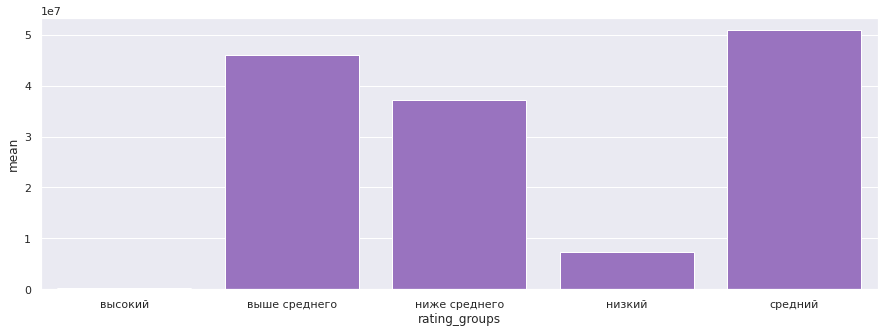

In [57]:
df_gover_rat = (df_gover.query('ratings !=0')
                        .pivot_table(index='rating_groups',
                                     values='box_office',
                                     aggfunc=['mean','median']
                                    )
                        .droplevel(1,axis=1)
                        .reset_index()

)
display(df_gover_rat)

sns.barplot(data=df_gover_rat, x="rating_groups", y="mean", color='#9966CC');

Узнаем, какие фильмы имеют низкий и высокий рейтинг и сделаем вывод.

In [58]:
display(df_gover.query('ratings != 0').sort_values(by='ratings').head(1))
df_gover.query('ratings == ratings.max()')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,director_main,genres_main,gover_budget_ratio,payback,rating_groups
115,Взломать Блогеров,111016616,2016-10-28 12:00:00,Художественный,"ООО ""ТаББаК""",Россия,М.Свешников,Т.Бекмамбетов,«6+» - для детей старше 6 лет,0,25000000,36016269,Фонд кино,1.0,"комедия,мультфильм,фантастика",7323648,2016,М.Свешников,комедия,0.694131,0.203343,низкий


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,director_main,genres_main,gover_budget_ratio,payback,rating_groups
17,Главный,111003415,2015-03-27 12:00:00,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0,10000000,40000000,Министерство культуры,9.4,"фантастика,боевик,комедия",334750,2015,Ю.Кара,фантастика,0.25,0.008369,высокий


- В основном фильмы с гос. поддержой имеют средний рейтинг, в пределах от 5 до 7. 
- Минимальный рейтинг 1 имеет фильм `Взломать блогеров`.
- Максимальный рейтинг у фильма `Главный`, его рейтинг составляет 9.4.

- Посмотрим, как зависят между собой столбцы: `box_office`, `budget`, `payback`, `ratings` и `gover_budget_ratio` <a id='43'></a>

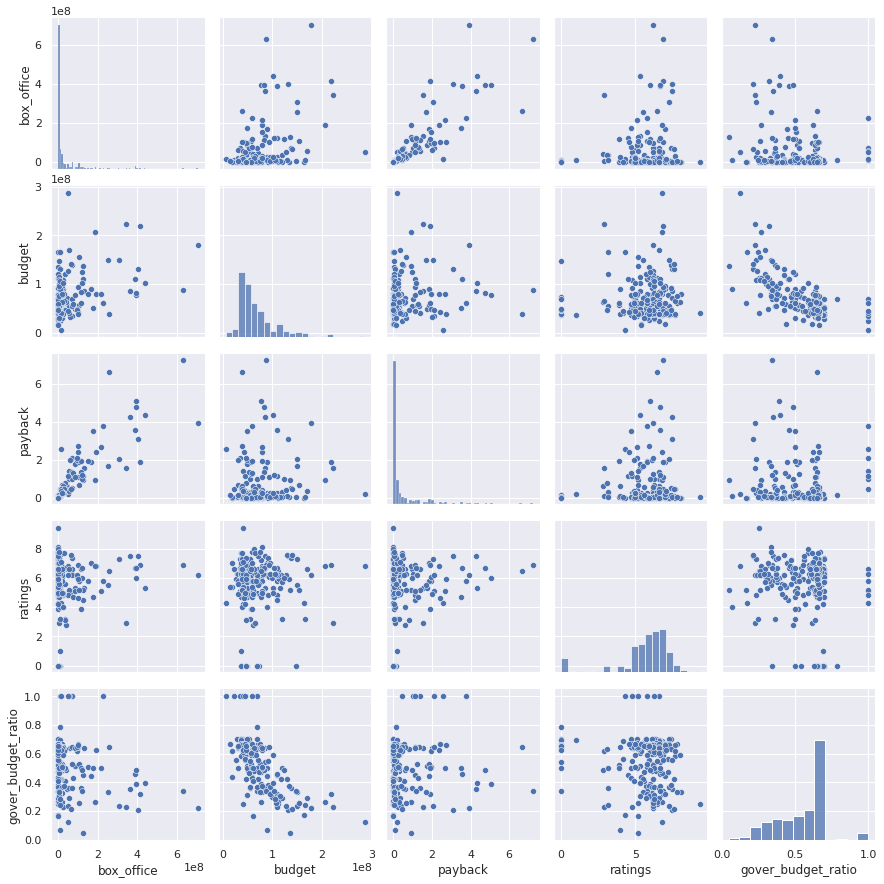

In [59]:
df_gover_slice = df_gover[['box_office', 'budget', 'payback', 'ratings', 'gover_budget_ratio']]

sns.pairplot(df_gover_slice);

In [60]:
df_gover_slice.corr()

,box_office,budget,payback,ratings,gover_budget_ratio
box_office,1.000000,0.439777,0.873039,0.105717,-0.284886
budget,0.439777,1.000000,0.180239,0.049744,-0.701393
payback,0.873039,0.180239,1.000000,0.086335,-0.087915
ratings,0.105717,0.049744,0.086335,1.000000,-0.127178
gover_budget_ratio,-0.284886,-0.701393,-0.087915,-0.127178,1.000000


- Присутствует заметная положительная корреляция между окупаемостью и кассовыми сборами (0.87), чем выше сбор, тем выше будет окупаемость;
- Также есть незначительная положительная корреляция между бюджетом и сбором;
- Рейтинг не зависит от финансовых значений;
- Доля гос. поддержки от бюджета фильмов везде имеет отрицательную зависимость.

 **Вывод** <a id='44'></a>

В ходе исследования фильмов с государственной поддержкой были сделаны следующие выводы:

Топ-20 фильмов, которые получили государственную поддержку.

- Самую большую гос. поддеружку получил фильм российско-китайского производства `Рай (2016)` (287802711), но при этом он не окупился (51704986). 
- Из нашего топ-20, видим, что фильм `Иван Царевич И Серый Волк 3` собрал 704928216 при бюджете 179257987. Видно, что этот фильм себя оккупил.
- Фильм `Иван Царевич И Серый Волк 3` окупил себя в 4 раз при финансировании в 179257987 руб., при этом в нашем топ-20 не окупился фильм `Грех` при значении 0.005 и бюджете в 164780000.

Определить, всегда ли высокие рейтинги фильма влекут высокие сборы от их прокат.

- В основном фильмы с гос. поддержой имеют средний рейтинг, в пределах от 5 до 7. 
- Минимальный рейтинг 1 имеет фильм `Взломать блогеров`.
- Максимальный рейтинг у фильма `Главный`, его рейтинг составляет 9.4.

Определить, есть ли зависить в столбцах `box_office`, `budget`, `payback`, `ratings`.

- Присутствует заметная положительная корреляция между окупаемостью и кассовыми сборами (0.87), чем выше сбор, тем выше будет окупаемость;
- Также есть незначительная положительная корреляция между бюджетом и сбором;
- Рейтинг не зависит от финансовых значений;
- Доля гос. поддержки от бюджета фильмов везде имеет отрицательную зависимость.

### Шаг 5. Общий вывод <a id='5'></a>

В ходе исследования была проведена предобработка данных - заполнены пропуски в столбцах, убраны неявные дубликаты, были приведены категориальные значения к общему виду, в количественных значениях заменили некоторые значения.

Предварительно были добавлены столбцы для изучения данных: год проката фильмов, имя и фамилия главного режиссера для каждой записи, основной жанр фильма и доля гос. поддержки от общего бюджета фильма для каждой записи.

Изучив более детально данные были сделаны следующие выводы по каждому из пунктов:

Исследование количества допущенных к прокату фильмов по годам

- Доля фильмов, для которых есть информация о сборах: 42.31%
- С 2010 года заметен рост вышедших фильмов в прокат.
- В 2017 году был резкий спад, но с 2018 г. значения вернулись в норму 2016 г. Скорее всего такой спад связан с <a href="https://www.kinopoisk.ru/media/news/2962751/"> повышеннием стоимости прокатного удостоверения до 5 млн. руб.</a> 
- Начиная с 2015 и до 2019 года доля фильмов, о которых известны результаты проката резко растет.

Изучение суммы сборов по годам

- Минимальная сумма сборов была в 2010 году и составила 2399095, в свою очередь максимальная  сумма сборов составляет 25916633419 (в 2018 г.). 
- С 2014 по 2018 г сборы значительно увелечились.

Изучение средних и медианых сумм сбора по годам

- Видим, что среднее и медиана сильно разняться. Это говорит нам об асимметрии, при этом, если среднее значение переменной больше медианы, ее распределение имеет положительную асимметрию. Также это говорит нам о наличие выбросах в столбце.

Исследование сумм сборов по годам с разбивкой по возрастным ограничениям фильмов

- с 2010 по 2014 г суммы сборов фильмов для каждого возрастного огранчения были минимальными.
- с 2015 по 2018 г лидировали фильмы с ограничение 16+, в остальных категориях заметен небольшой спад или значения не особо менялись.В 2018 г сбор составил 9.126963^9 (при этом это значение является максимальным за все время и во всех категориях возрастного ограничения). 
- Меньше всего сборов за все время собрала категория 0+.

В ходе исследования фильмов с государственной поддержкой были сделаны следующие выводы:

Топ-20 фильмов, которые получили государственную поддержку.

- Самую большую гос. поддеружку получил фильм российско-китайского производства `Рай (2016)` (287802711), но при этом он не окупился (51704986). 
- Из нашего топ-20, видим, что фильм `Иван Царевич И Серый Волк 3` собрал 704928216 при бюджете 179257987. Видно, что этот фильм себя оккупил.
- Фильм `Иван Царевич И Серый Волк 3` окупил себя в 4 раз при финансировании в 179257987 руб., при этом в нашем топ-20 не окупился фильм `Грех` при значении 0.005 и бюджете в 164780000.

Определить, всегда ли высокие рейтинги фильма влекут высокие сборы от их прокат.

- В основном фильмы с гос. поддержой имеют средний рейтинг, в пределах от 5 до 7. 
- Минимальный рейтинг 1 имеет фильм `Взломать блогеров`.
- Максимальный рейтинг у фильма `Главный`, его рейтинг составляет 9.4.

Определить, есть ли зависить в столбцах `box_office`, `budget`, `payback`, `ratings`.

- Присутствует заметная положительная корреляция между окупаемостью и кассовыми сборами (0.87), чем выше сбор, тем выше будет окупаемость;
- Также есть незначительная положительная корреляция между бюджетом и сбором;
- Рейтинг не зависит от финансовых значений;
- Доля гос. поддержки от бюджета фильмов везде имеет отрицательную зависимость.